# Psihološki efekti KOVID-a

Koronavirusna bolest 2019 (engl. Coronavirus disease 2019), prepoznatljiva pod skraćenicom kovid 19 ili COVID-19, zarazna je bolest uzrokovana teškim akutnim respiratornim sindromom virus korona 2 (SARS-CoV-2). Bolest se od 2019. proširila na ceo svet što je dovelo do pandemije virusa korona 2019/20.
Pandemija je ostavila snažan pečat na svakodnevni život ljudi već više od dve godine. Medju mnogim posledicama pandemije nalaze se i psihološke, koje su doprinele masovnim pojavama anksioznosti i depresije. 

Skup podataka je preuzet sa: https://www.kaggle.com/datasets/hemanthhari/psycological-effects-of-covid. 
Podaci su prikupljeni 2020. godine u cilju razumevanja mišljenja ljudi o "zaključavanju" i koliko je to uticalo na njihovu promenu načina života.

Cilj ovog projekta je kako su različiti aspekti života, kao što su radne navike i novo radno okruženje, produktivnost, društveni i porodični odnosi, opuštenost,... se promenili i u kojoj meri su se pojedinci prilagodili novim okolnostima, a najviše kako je to uticalo na emocionalnom nivou. 

### Učitavanje skupa podataka

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
data = pd.read_csv('psyco.csv')
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

### Brisanje nepotrebnih kolona
"Please note that all the custom columns can be ignored."
* X, net_diff - Custom Column (Unnamed: 19)
* time_bp.1  - Custom Column
* travel_new - Custom Column
* net_diff   - Custom Column  

In [4]:
data.drop(['Unnamed: 19', 'time_bp.1', 'travel+work'], inplace = True, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

### Nedostajuće vrednosti

In [5]:
data.isna().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

izbacivanje nedostajućih vrednosti

In [6]:
data.drop(['line_of_work'], axis = 1, inplace = True)
data.isna().sum()

age               0
gender            0
occupation        0
time_bp           0
time_dp           0
travel_time       0
easeof_online     0
home_env          0
prod_inc          0
sleep_bal         0
new_skill         0
fam_connect       0
relaxed           0
self_time         0
like_hw           0
dislike_hw        0
prefer            0
certaindays_hw    0
dtype: int64

## Statistička analiza

In [7]:
data.shape

(1175, 18)

In [8]:
data.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [9]:
data.age.unique()

array(['19-25', 'Dec-18', '33-40', '60+', '26-32', '40-50', '50-60'],
      dtype=object)

potrebno je zameniti vrednost 'Dec-18' sa '0-18'

In [10]:
data['age'].replace('Dec-18', '0-18', inplace = True)

opisna statistika

In [11]:
data.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000


## Vizuelizacija podataka

Vizualno predstaviti podatke nam omogućava lakše upoznavanje i razumevanje podataka, njihovih raspodela, lakše identifikovanje obrazaca, korelacija i eventualnih anomalija.

### Upoznavanje sa skupom podataka

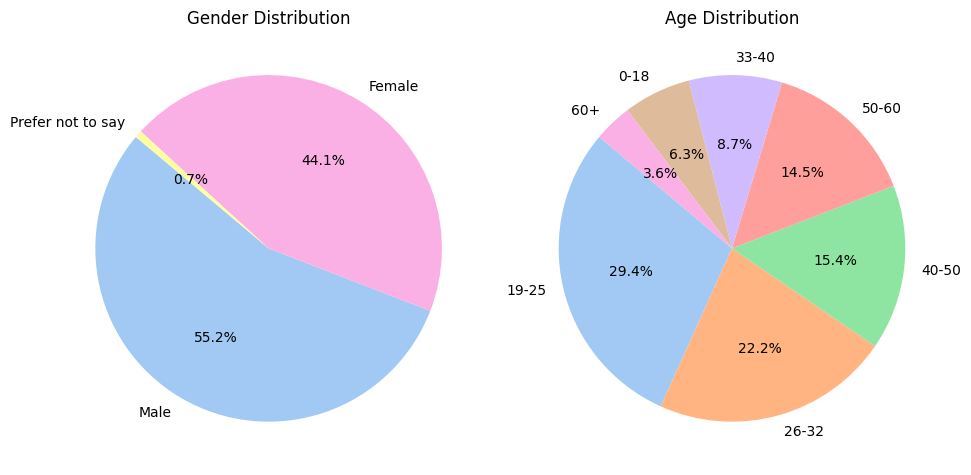

In [12]:
# kreiranje subplot-a 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# kreiranje pie chart-a za pol
color = [sns.color_palette("pastel")[0], sns.color_palette("pastel")[6], sns.color_palette("pastel")[8]]
gender_map = data['gender'].value_counts()
axs[0].pie(gender_map, labels = gender_map.index, autopct = '%.1f%%', colors = color, startangle = 140)
axs[0].set_title("Gender Distribution")

# kreiranje pie chart-a za godine
age_map = data['age'].value_counts()
axs[1].pie(age_map, labels = age_map.index, autopct = '%.1f%%', colors = sns.color_palette("pastel"), startangle = 140)
axs[1].set_title("Age Distribution")

plt.tight_layout()
plt.show()

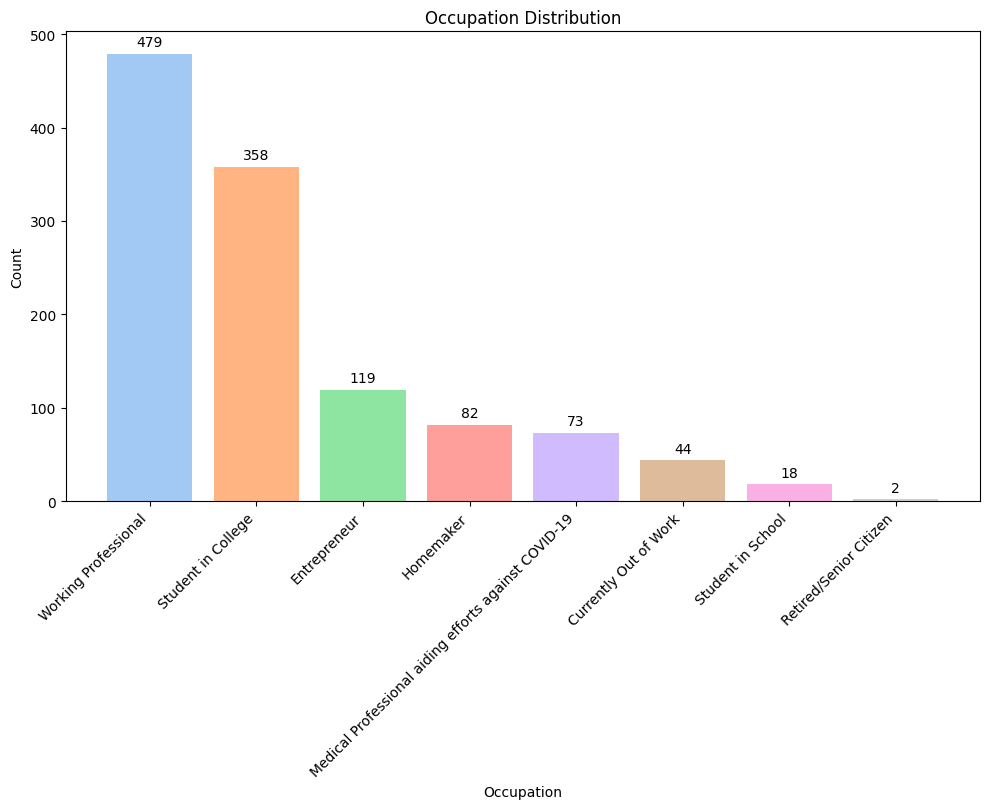

In [13]:
occupation_map = data['occupation'].value_counts()

# kreiranje bar grafikona
plt.figure(figsize = (10, 8.2))
plt.bar(occupation_map.index, occupation_map.values, color = sns.color_palette("pastel"))
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation Distribution")

# rotiranje etiketa radi bolje čitljivosti
plt.xticks(rotation = 45, ha = "right", fontsize = 10)

# dodavanje vrednosti iznad barova
for i, count in enumerate(occupation_map):
    plt.text(i, count + 5, str(count), ha = "center", va = "bottom")

plt.tight_layout()
plt.show()

### Promena radnog vremena

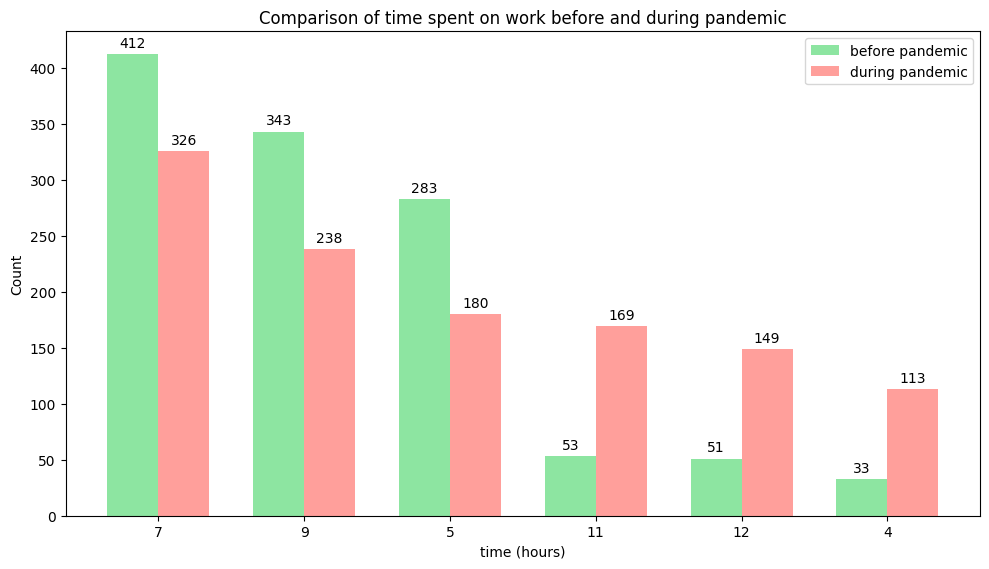

In [14]:
categories = data.time_bp.value_counts().index
time_bp_counts = data.time_bp.value_counts().values
time_dp_counts = data.time_dp.value_counts().values

x = np.arange(len(categories))  # X koordinate za svaku kategoriju
width = 0.35                    # širina traka

# kreiranje grouped bar grafikona
fig, gb = plt.subplots(figsize = (10, 5.8))
rects1 = gb.bar(x - width/2, time_bp_counts, width, label = 'before pandemic', color = sns.color_palette('pastel')[2])
rects2 = gb.bar(x + width/2, time_dp_counts, width, label = 'during pandemic', color = sns.color_palette('pastel')[3])

# podešavanje oznaka, naslova i legende
gb.set_ylabel("Count")
gb.set_xlabel("time (hours)")
gb.set_title("Comparison of time spent on work before and during pandemic")
gb.set_xticks(x)
gb.set_xticklabels(categories)
gb.legend()

# dodavanje vrednosti iznad traka
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        gb.annotate('{}'.format(height), xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3), textcoords = "offset points", ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Sa grafika možemo da zaključimo da se tokom korone smanjio broj osoba koji su radili 5, 7 i 9 sati pre korone i da se broj ljudi koji rade 11 i 12 sati dnevno tri puta povecao.

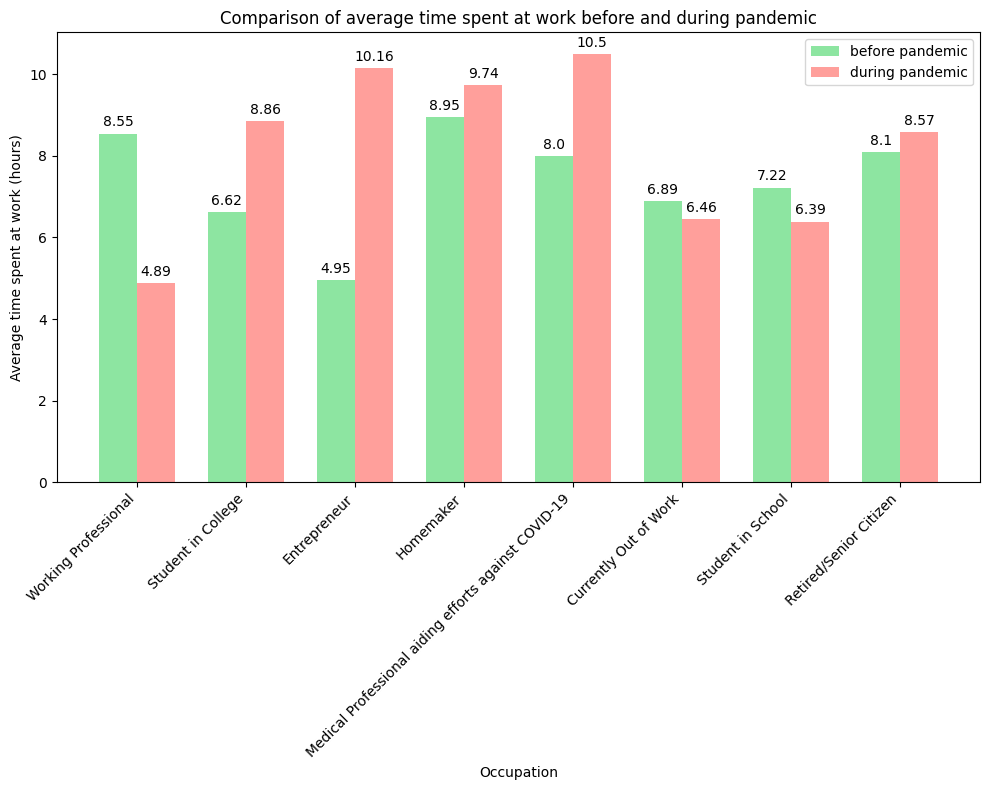

In [15]:
categories = data.occupation.value_counts().index
avg_time_bp = data.groupby("occupation")[["time_bp"]].mean()  # dataFrame -> occupation, time_bp = avg time_bp
avg_time_dp = data.groupby("occupation")[["time_dp"]].mean()  # dataFrame -> occupation, timr_dp = avg time_dp

x = np.arange(len(categories))  # X koordinate za svaku kategoriju
width = 0.35                    # širina trake

# kreiranje grouped bar grafikona
fig, gb = plt.subplots(figsize=(10, 8))
rects1 = gb.bar(x - width/2, avg_time_bp["time_bp"].value_counts().index, width, label = 'before pandemic', color = sns.color_palette('pastel')[2])
rects2 = gb.bar(x + width/2, avg_time_dp["time_dp"].value_counts().index, width, label = 'during pandemic', color = sns.color_palette('pastel')[3])

# podešavanje oznaka, naslova i legende
gb.set_ylabel("Average time spent at work (hours)")
gb.set_xlabel("Occupation")
gb.set_title("Comparison of average time spent at work before and during pandemic")
gb.set_xticks(x)
gb.set_xticklabels(categories, rotation = 45, ha = 'right', fontsize = 10)
gb.legend()

# dodavanje vrednosti iznad traka
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        gb.annotate('{}'.format(round(height, 2)), xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3), textcoords = "offset points", ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Na prvom mestu po povećanju radnog vremena su preduzetnici, koji su duplo povećali prosečan broj sati provedenog na poslu. Na drugom mestu su medicinski radnici (povećanje 2.5h) i na trećem studenti (povećanje 2.2h). Pandemija se negativno odrazila na mnoge zaposlene čije se radno vreme smanjilo skoro duplo.

### Produktivnost

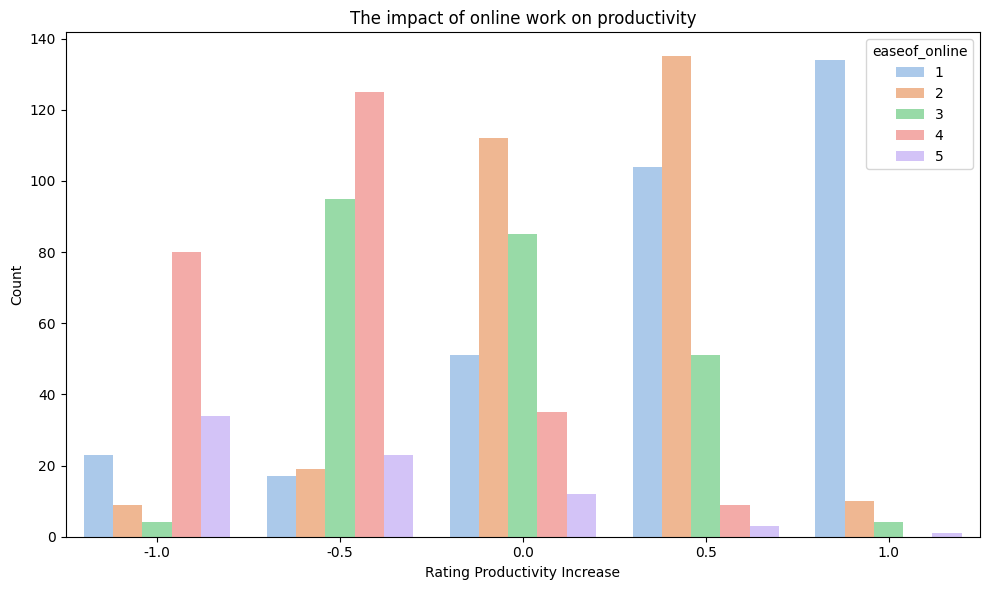

In [16]:
# kreiranje subplot-a
fig, axs = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'prod_inc', hue = 'easeof_online', data = data, ax = axs, palette = 'pastel')

# podešavanje oznaka i naslova
plt.title("The impact of online work on productivity")
plt.xlabel("Rating Productivity Increase")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

1 - lako prilagođavanje, 5 - teško prilagođavanje na online režim rada

Produktivnije osobe su bile one koje su se lakše prilagodile online načinu rada.

### Porodični odnosi

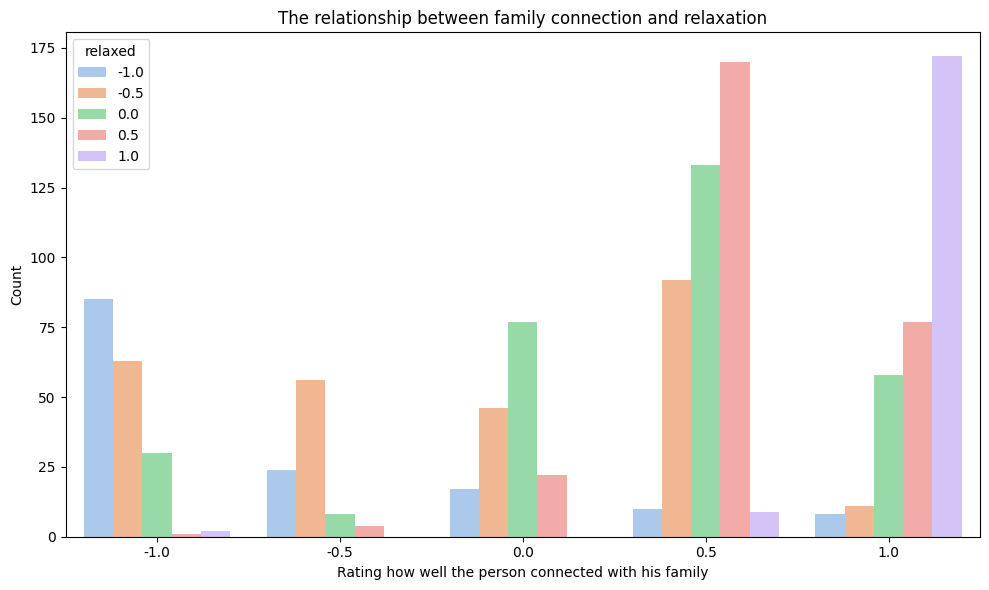

In [19]:
# kreiranje subplot-a
fig, axs = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'fam_connect', hue = 'relaxed', data = data, ax = axs, palette = 'pastel')

# podešavanje oznaka i naslova 
plt.title("The relationship between family connection and relaxation")
plt.xlabel("Rating how well the person connected with his family")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Osobe koje su se bolje povezale u pandemiji sa svojom porodicom osećaju se opuštenije, dok osobe koje se nisu povezale ili su se čak udaljile su uznemirenije i pod većim stresom. 

### Matrica korelacije

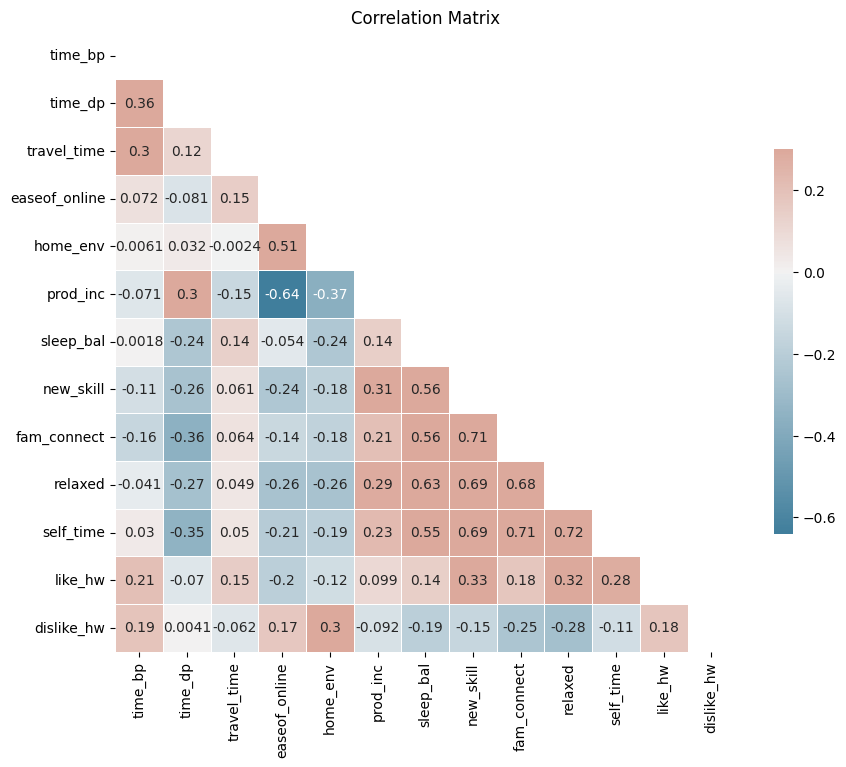

In [20]:
df = data.drop(['age', "gender", "occupation", "prefer", "certaindays_hw"], axis = 1)
corr = df.corr()

# kreiranje maske u obliku trougla
mask = np.triu(np.ones_like(corr, dtype=bool))

# kreiranje 
fig, ax = plt.subplots(figsize = (10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)

plt.title('Correlation Matrix')
plt.show()

Korelacija je mera koja meri zavisnost između dva numerička atributa, tj. kako vrednosti jednog atributa utiču na vrednosti drugog atributa. Što je po apsolutnoj vrednosti koeficijenat korelacije veći, to je jača veza između ova dva atributa.

Da bi nam bilo lakše vizuelizovati koji atributi zavisi od koga, formiraćemo graf sa pragom 0.3 po apsolutnoj vrednosti.

/home/parallels/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


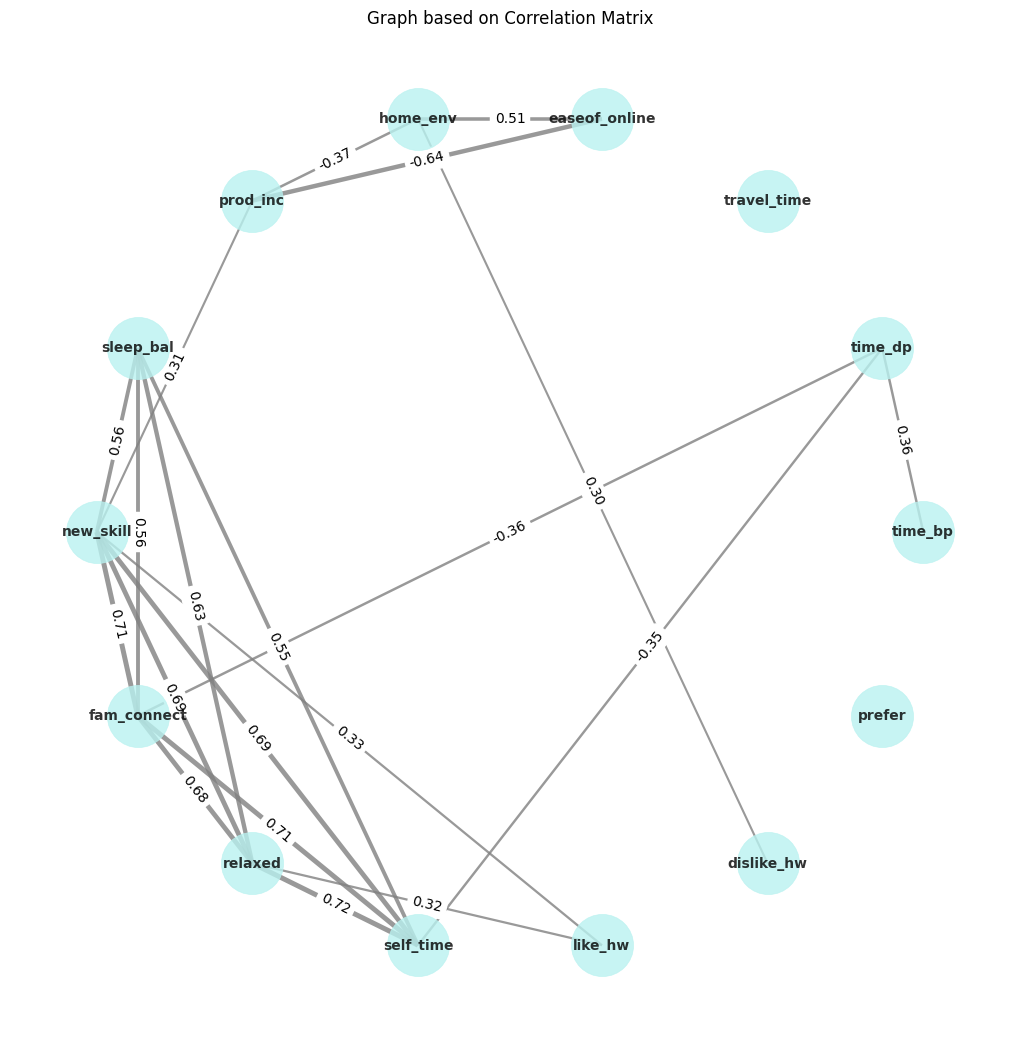

In [21]:
# kreiranje grafa
G = nx.Graph()
correlation_matrix = np.corrcoef(df, rowvar=False)

# dodavanje cvorova u graf
ime = ["time_bp", "time_dp", "travel_time", "easeof_online", "home_env", "prod_inc", "sleep_bal", "new_skill", 
       "fam_connect", "relaxed", "self_time", "like_hw", "dislike_hw", "prefer"]
for i in range(len(ime)):
    G.add_node(i, label = f'{ime[i]}')

# dodavanje grana u graf
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[1]):
        weight = correlation_matrix[i, j]
        # prag za prikazivanje grana
        if abs(weight) > 0.3:  
            G.add_edge(i, j, weight = weight)

# crtanje grafa 
pos = nx.circular_layout(G)
edges = G.edges()
weights = {(u, v): G[u][v]['weight'] for u, v in edges}

# podešavanje izgleda
node_labels = {node: data for node, data in G.nodes(data = 'label')}
edge_labels = {edge: f'{weight:.2f}' for edge, weight in weights.items()}  
edge_widths = [w * 5 for w in weights.values()] 
pastel_color = sns.color_palette("pastel")[9]

plt.figure(figsize = (10, 10))
nx.draw(G, pos, edgelist = edges, width = edge_widths, edge_color = 'gray', node_size = 2000, 
        node_color = pastel_color, font_color = 'black', with_labels = True, labels = node_labels, 
        font_size = 10, font_weight = 'bold', alpha = 0.8, linewidths = 0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 10)
plt.title('Graph based on Correlation Matrix')

plt.show()

Na osnovu grafa možemo da zaključimo da od svakog čvora (sem travel_time i prefer) postoji put - direktna ili preko nekog drugog čvora grana do bar jednog od čvorova: prod_inc, sleep_bal, new_skill, fam_connect, relaxed ili self_time. To nam ukazuje da su ovi atributi imali dosta uticaja na ostale atribute, odnosno ova stanja su imala dosta uticaja na samu osobu tokom pandemije.